In [54]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Task 7
The purpose of task 7 is to analyze the dataset from [Real Time Bidding from kaggle](https://www.kaggle.com/datasets/zurfer/rtb) where the challenge is to predict if an advertiser should bid for a marketing slot e.g. a banner on a webpage

## Part1 - Looking at the Data
Let's look at the data to see what kind of data we have, the data type and structure

In [35]:
data_df = pd.read_csv('biddings.csv')

In [36]:
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,convert
0,-0.01,-0.43,2.22,-0.59,0.80,0.21,-0.19,0.30,-0.25,0.42,...,-0.07,0.30,-0.19,0.61,-0.04,0.36,-0.18,-0.24,0.07,0
1,0.00,-4.11,1.48,0.92,-7.37,0.60,0.37,1.95,0.19,0.85,...,-0.57,-0.27,1.17,-0.52,-1.43,-0.24,-0.41,0.71,-0.22,0
2,0.01,-5.03,-2.78,-0.83,0.92,0.46,0.10,1.36,-0.74,1.62,...,-0.13,0.33,0.38,0.41,-0.61,0.24,-0.10,-1.19,0.37,0
3,-0.02,1.98,2.30,0.87,-7.09,0.36,0.16,1.79,0.23,0.26,...,0.07,0.41,-0.81,-0.49,0.07,-0.20,-0.31,-0.55,0.18,0
4,-0.01,0.14,-2.43,-0.68,0.73,-1.47,0.68,1.93,-0.35,3.12,...,-0.04,0.03,0.07,-0.05,-0.02,-0.01,0.00,-0.20,0.07,0


Here we can see that the dataframe has a bunch of parameterized values with numbers, which is a little bit hard to analyze them individually because they don't have a lot of meaning and a column called convert, which stands for 0 when not clicked and 1 to clicked

In [37]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 89 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   0        1000000 non-null  float64
 1   1        1000000 non-null  float64
 2   2        1000000 non-null  float64
 3   3        1000000 non-null  float64
 4   4        1000000 non-null  float64
 5   5        1000000 non-null  float64
 6   6        1000000 non-null  float64
 7   7        1000000 non-null  float64
 8   8        1000000 non-null  float64
 9   9        1000000 non-null  float64
 10  10       1000000 non-null  float64
 11  11       1000000 non-null  float64
 12  12       1000000 non-null  float64
 13  13       1000000 non-null  float64
 14  14       1000000 non-null  float64
 15  15       1000000 non-null  float64
 16  16       1000000 non-null  float64
 17  17       1000000 non-null  float64
 18  18       1000000 non-null  float64
 19  19       1000000 non-null  float64
 20  20 

From the info is it possible to see that no null values, so treating null values will not be necessary

In [38]:
data_df["convert"].value_counts()

convert
0    998092
1      1908
Name: count, dtype: int64

Here we can see that we only have 0 and 1 for conversions, which will be the focus of prediction

## EDA
So for EDA, Since we can't analyze individual columns because they don't mean anything, we'll go for the correlations

<Axes: >

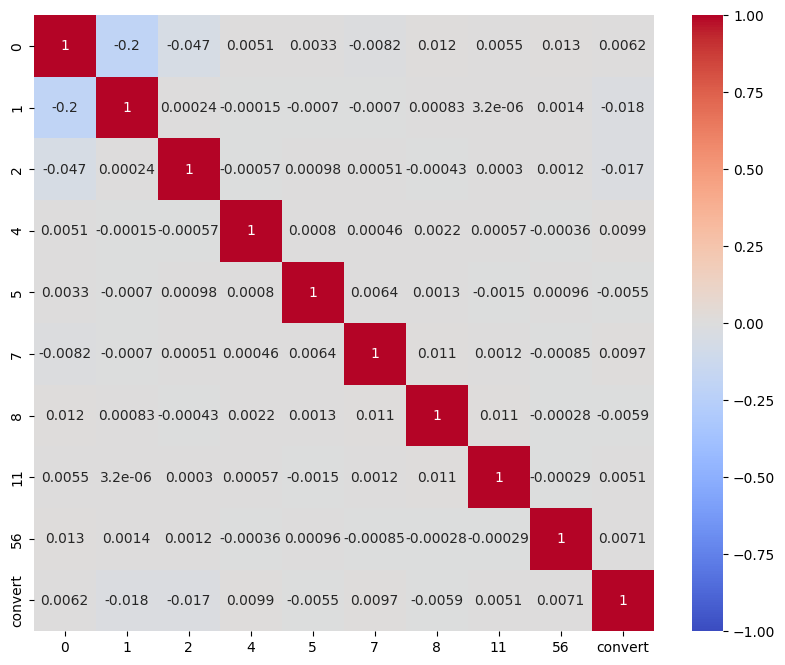

In [39]:
correlation = data_df.corr()
# sns.heatmap(correlation)
filtered_columns = correlation.index[correlation["convert"].abs() >= 0.005]
filtered_corr_matrix = correlation.loc[filtered_columns, filtered_columns]

plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

Here it's possible to see that the correlation for all columns are very, very weak and none of them outstands each other. We can see that only 8 columns has bigger correlation than 0.005, which is really, really low. So the option is to test the models to see how they will perform

## Discovering the best model
First, before trying the models, there is a need to balance the data, because more than 90% of the data is unbalanced

In [40]:
df_majority = data_df[data_df.convert == 0]
df_minority = data_df[data_df.convert == 1]

df_majority_undersampled = df_majority.sample(n=len(df_minority), random_state=42)

df_balanced = pd.concat([df_minority, df_majority_undersampled])

Now, with some models collected from sklearn, It's time to see what is the one with the best accuracy

In [143]:
X = data_df.drop(columns=['convert'])
y = data_df['convert']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression()
}

best_model = None
best_accuracy = 0
best_name = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_name = name

print(f"Best Model: {best_model} with Accuracy: {best_accuracy}")

Logistic Regression Accuracy: 0.99811
Best Model: LogisticRegression() with Accuracy: 0.99811


## Using Coefficients to analyze the data

Here we create a dataframe with coefficient and the columns names, and finishing with the abs to rank them. The bigger positive correspond to 1, and the bigger negative correspond to 0

In [78]:
coeficients = best_model.coef_[0]
features_df = pd.DataFrame({
    "Coefficients": coeficients,
    "Features": X.columns,
    "Absolute Coefficient": np.abs(coeficients)
})
features_df = features_df.sort_values(by="Absolute Coefficient", ascending=False)
features_df.head(10).cumsum()

,Coefficients,Features,Absolute Coefficient
4,0.153998,4,0.153998
56,0.305691,456,0.305691
2,0.159147,4562,0.452236
35,0.030789,456235,0.580593
7,0.151924,4562357,0.701728
48,0.036266,456235748,0.817387
49,0.151674,45623574849,0.932795
13,0.039198,4562357484913,1.045271
30,0.149215,456235748491330,1.155288
1,0.039371,4562357484913301,1.265131


In [89]:
series = (features_df["Absolute Coefficient"]/features_df["Absolute Coefficient"].sum()).cumsum()
series_df = pd.DataFrame(series)
series_df["id"] = [x + 1 for x in range(len(series))]
series_df

,Absolute Coefficient,id
4,0.037538,1
56,0.074514,2
2,0.110236,3
35,0.141524,4
7,0.171052,5
...,...,...
3,0.998821,84
44,0.999445,85
20,0.999837,86
46,0.999999,87


Now create a graphic where it's possible to see the relevant columns using the absolute coeficient values to see the impact

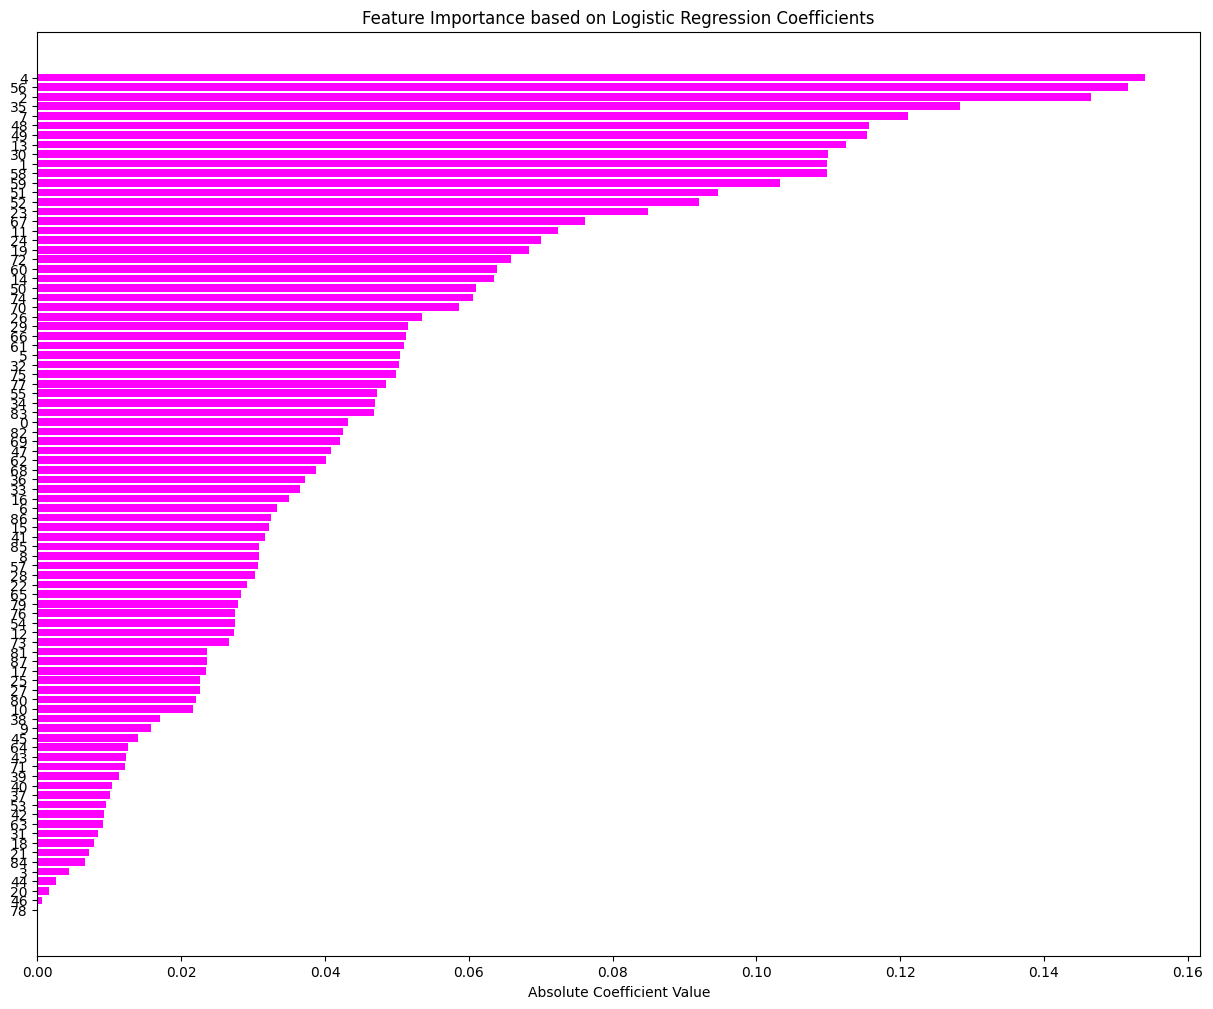

In [74]:
plt.figure(figsize=(15, 12))
plt.barh(features_df['Features'], features_df['Absolute Coefficient'], color='magenta')
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance based on Logistic Regression Coefficients')
plt.gca().invert_yaxis()
plt.show()

Now Creating another graphic to see the non-abosute coefficient data to see if there are imbalance between positive and negative

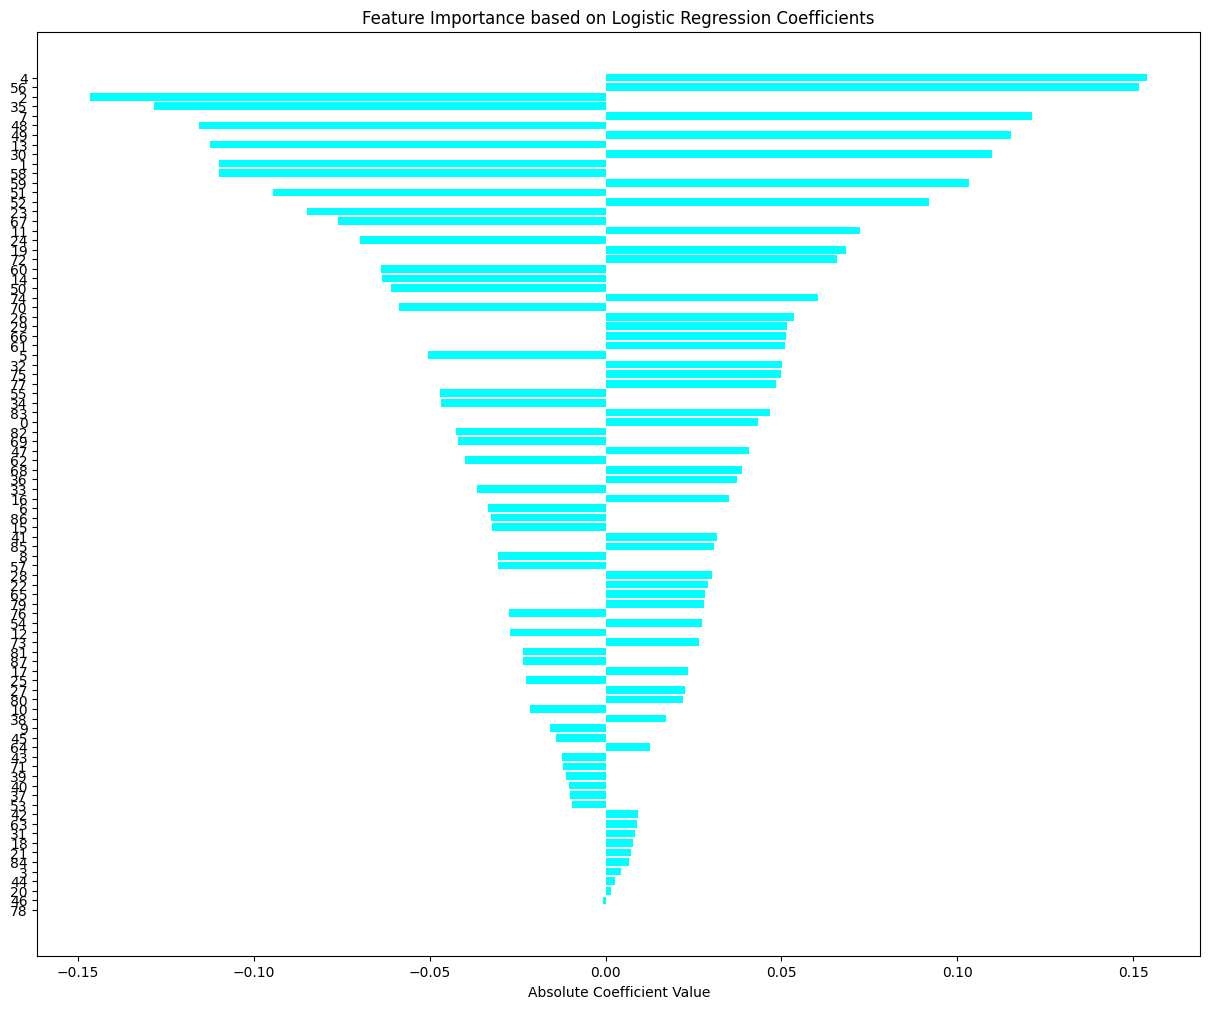

In [70]:
plt.figure(figsize=(15, 12))
plt.barh(features_df['Features'], features_df['Coefficients'], color='cyan')
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance based on Logistic Regression Coefficients')
plt.gca().invert_yaxis()
plt.show()

So here we reach the conclusion that the features are heavily balanced, and so to achieve the best output, we can use the top 5 positive columns and top 5 negative columns instead of using all 88 columns, which leads to <br>
positives: 4, 56, 7, 49, 30 <br>
negatives: 2, 35, 48, 13, 1

## Testing with the whole data to see the result

In [26]:
X_full = data_df.drop(columns=['convert'])
y_full = data_df['convert']
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

In [28]:
y_pred_full = best_model.predict(X_test_full)
accuracy_full = accuracy_score(y_test_full, y_pred_full)
print(accuracy_full)

0.52288


/Users/anderson.lima/PycharmProjects/task7/venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


The conclusion is that the model can get some accuracy when the data is sampled, but when the whole data enters, the model get very confused, and it's dificult to predict.

## Saving the model, so it can be used in a python application

In [30]:
import pickle
with open('model.pkl', 'wb') as handle:
    pickle.dump(best_model, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [33]:
data_df.drop("convert", axis=1).sample(n=10, random_state=42).to_json("test.json", orient='records')

## New Analysis using kurtosis and skewness

/var/folders/v7/c0zmzc6n3r553_kglggjhnfm0000gn/T/ipykernel_60341/3753145271.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df.iloc[:,1])


<Axes: xlabel='1', ylabel='Density'>

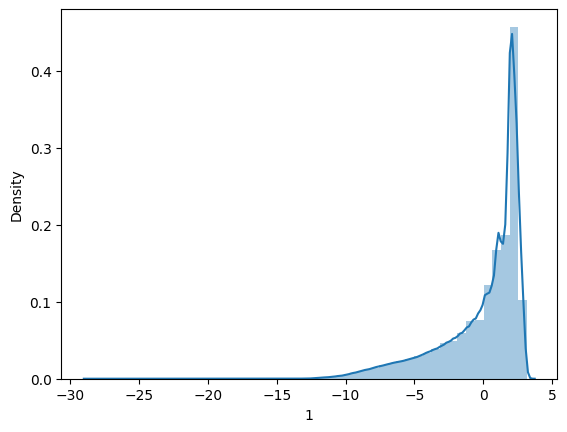

In [100]:
sns.distplot(data_df.iloc[:,1])

### Calculating Skew and kurtosis

In [108]:
df_stats = pd.DataFrame({"kurtosis": data_df.kurtosis(axis=0), "skew": data_df.skew(axis=0)})
df_stats = df_stats.drop(df_stats.index[-1])
df_stats

,kurtosis,skew
0,60355.897598,213.503786
1,1.782972,-1.511489
2,-1.467835,-0.366557
3,32.818432,5.726691
4,34.198731,-4.828195
...,...,...
83,1.661845,0.012219
84,3.787543,0.007266
85,4.355877,1.472632
86,24.268316,-0.612946


Describing the stats so it can be grouped on statistics

In [109]:
df_stats.describe()

,kurtosis,skew
count,88.000000,88.000000
mean,4359.769100,0.322937
std,16182.662185,41.348252
min,-1.467835,-188.002824
25%,1.789874,-2.927518
50%,33.307723,-0.042566
75%,428.679769,0.649924
max,95406.464565,213.503786


### Grouping columns based on kurtosis and skew

In [112]:
def divide_columns(dfs, column_name):
    df = dfs.copy()
    df[f"g_{column_name}"] = pd.qcut(
        df[column_name],
        q=[0, 0.25, 0.75, 1.0],
        labels=[f"low_{column_name}", f"middle_{column_name}",f"high_{column_name}"],
    )
    return df

In [113]:
df_stats_k = divide_columns(df_stats, "kurtosis")
df_stats_skew = divide_columns(df_stats_k, "skew")
df_stats_skew

,kurtosis,skew,g_kurtosis,g_skew
0,60355.897598,213.503786,high_kurtosis,high_skew
1,1.782972,-1.511489,low_kurtosis,middle_skew
2,-1.467835,-0.366557,low_kurtosis,middle_skew
3,32.818432,5.726691,middle_kurtosis,high_skew
4,34.198731,-4.828195,middle_kurtosis,low_skew
...,...,...,...,...
83,1.661845,0.012219,low_kurtosis,middle_skew
84,3.787543,0.007266,middle_kurtosis,middle_skew
85,4.355877,1.472632,middle_kurtosis,high_skew
86,24.268316,-0.612946,middle_kurtosis,middle_skew


In [116]:
df_stats_skew["g"] = df_stats_skew["g_kurtosis"].astype(str) + "-" + df_stats_skew["g_skew"].astype(str)
df_stats_skew

,kurtosis,skew,g_kurtosis,g_skew,g
0,60355.897598,213.503786,high_kurtosis,high_skew,high_kurtosis-high_skew
1,1.782972,-1.511489,low_kurtosis,middle_skew,low_kurtosis-middle_skew
2,-1.467835,-0.366557,low_kurtosis,middle_skew,low_kurtosis-middle_skew
3,32.818432,5.726691,middle_kurtosis,high_skew,middle_kurtosis-high_skew
4,34.198731,-4.828195,middle_kurtosis,low_skew,middle_kurtosis-low_skew
...,...,...,...,...,...
83,1.661845,0.012219,low_kurtosis,middle_skew,low_kurtosis-middle_skew
84,3.787543,0.007266,middle_kurtosis,middle_skew,middle_kurtosis-middle_skew
85,4.355877,1.472632,middle_kurtosis,high_skew,middle_kurtosis-high_skew
86,24.268316,-0.612946,middle_kurtosis,middle_skew,middle_kurtosis-middle_skew


In [125]:
df_to_group = df_stats_skew[["g"]].groupby("g").apply(lambda g: list(g.index))
df_to_group

/var/folders/v7/c0zmzc6n3r553_kglggjhnfm0000gn/T/ipykernel_60341/858982924.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_to_group = df_stats_skew[["g"]].groupby("g").apply(lambda g: list(g.index))


pandas.core.series.Series

Here We have ready the grouping, now we have to apply the mean for each group into de original df

### Applying the result to calculate the grouped mean

In [140]:
grouped_df = pd.DataFrame(df_to_group)
df_means = data_df.copy()
indexes = []
for index, array in grouped_df.itertuples():
    df_means[index] = df_means[array].mean(axis=1)
    indexes.append(index)
indexes.append("convert")
final_grouped_df = df_means[indexes]
final_grouped_df

,high_kurtosis-high_skew,high_kurtosis-low_skew,high_kurtosis-middle_skew,low_kurtosis-middle_skew,middle_kurtosis-high_skew,middle_kurtosis-low_skew,middle_kurtosis-middle_skew,convert
0,-0.174286,0.010714,-0.12,-0.055455,-0.032667,0.16250,0.024762,0
1,-0.220000,0.029286,-0.08,0.035455,0.140667,-0.61250,0.394762,0
2,0.067143,-0.042143,-0.03,-0.616818,0.053333,0.41000,0.015238,0
3,-0.100000,0.085714,-0.17,0.187727,0.076667,-0.57875,0.309048,0
4,-0.045714,0.055714,-1.52,-0.049091,0.364667,0.15125,0.370476,0
...,...,...,...,...,...,...,...,...
999995,-0.145714,0.055714,-0.18,0.115455,-0.014000,0.12250,-0.097619,0
999996,0.034286,-0.111429,0.00,-0.103636,-0.096667,-0.13625,0.446190,0
999997,-0.087143,-0.012857,0.02,0.229091,0.075333,0.34375,-0.143333,0
999998,0.091429,-0.092857,-0.13,0.169545,-0.276000,-0.10500,-0.061429,0


### Applying Logistic Regression Again

In [142]:
g_X = final_grouped_df.drop(columns=['convert'])
g_y = final_grouped_df['convert']
g_X_train, g_X_test, g_y_train, g_y_test = train_test_split(g_X, g_y, test_size=0.2, random_state=42)
g_model = LogisticRegression()


g_model.fit(g_X_train, g_y_train)
g_y_pred = g_model.predict(X_test)
g_accuracy = accuracy_score(g_y_test, g_y_pred)
print(f"Accuracy: {g_accuracy}")

print(f"{g_model} with Accuracy: {g_accuracy}")

Accuracy: 0.99811
LogisticRegression() with Accuracy: 0.99811


In [150]:
g_coeficients = g_model.coef_[0]
g_features_df = pd.DataFrame({
    "Coefficients": g_coeficients,
    "Features": g_X.columns,
    "Absolute Coefficient": np.abs(g_coeficients)
})
g_features_df = g_features_df.sort_values(by="Absolute Coefficient", ascending=False)
g_features_df

,Coefficients,Features,Absolute Coefficient
3,-1.313906,low_kurtosis-middle_skew,1.313906
5,0.687282,middle_kurtosis-low_skew,0.687282
0,-0.184208,high_kurtosis-high_skew,0.184208
6,-0.161859,middle_kurtosis-middle_skew,0.161859
4,-0.141135,middle_kurtosis-high_skew,0.141135
1,0.072194,high_kurtosis-low_skew,0.072194
2,0.040921,high_kurtosis-middle_skew,0.040921


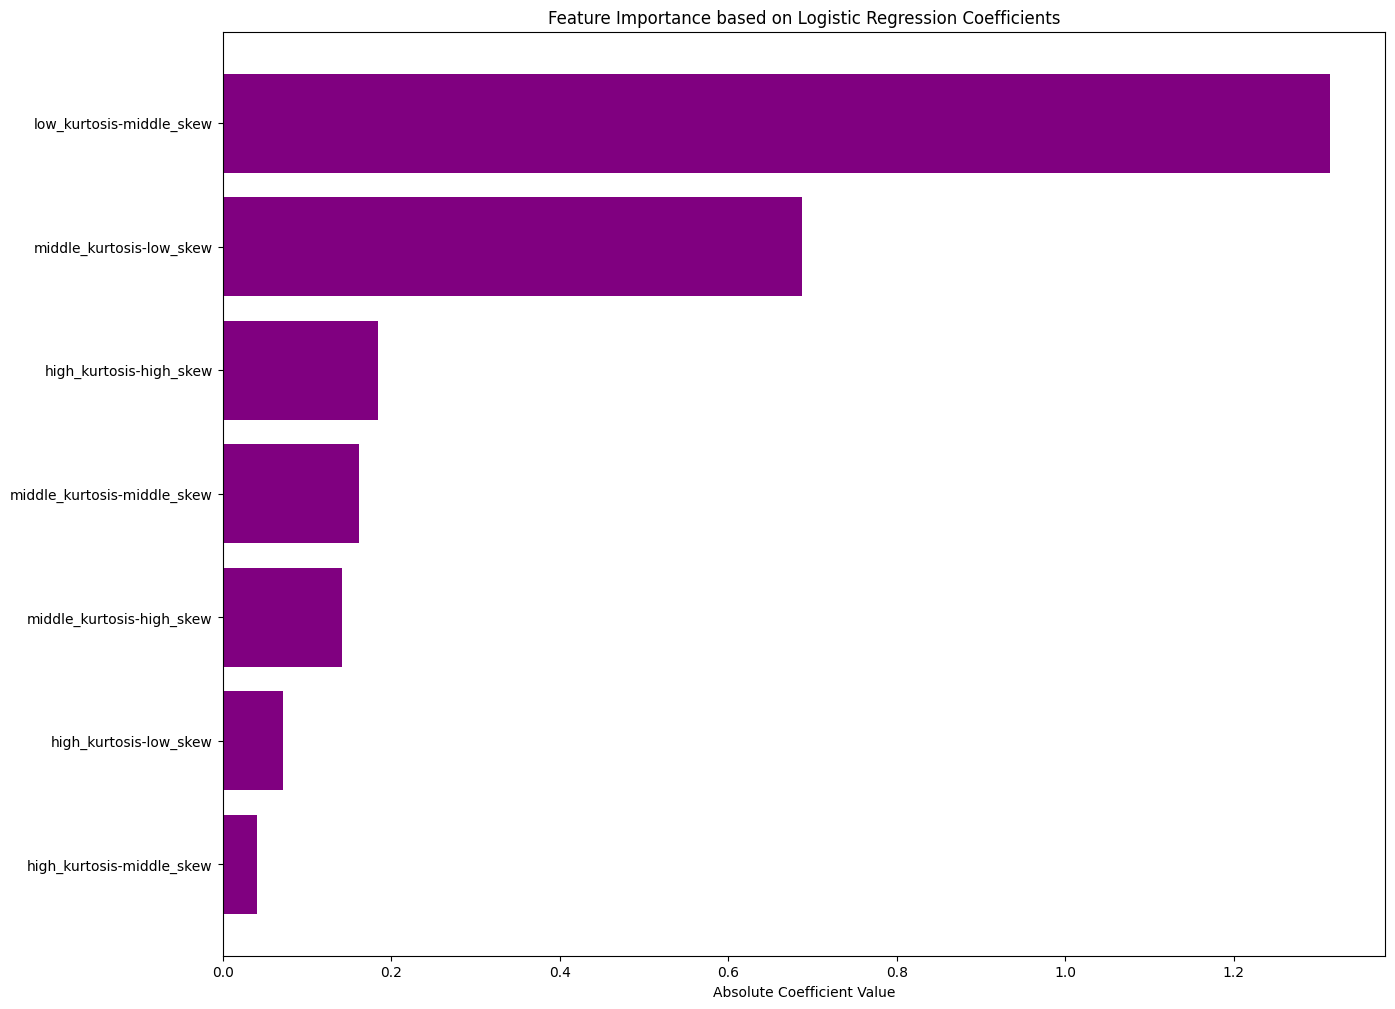

In [151]:
plt.figure(figsize=(15, 12))
plt.barh(g_features_df['Features'], g_features_df['Absolute Coefficient'], color='purple')
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance based on Logistic Regression Coefficients')
plt.gca().invert_yaxis()
plt.show()

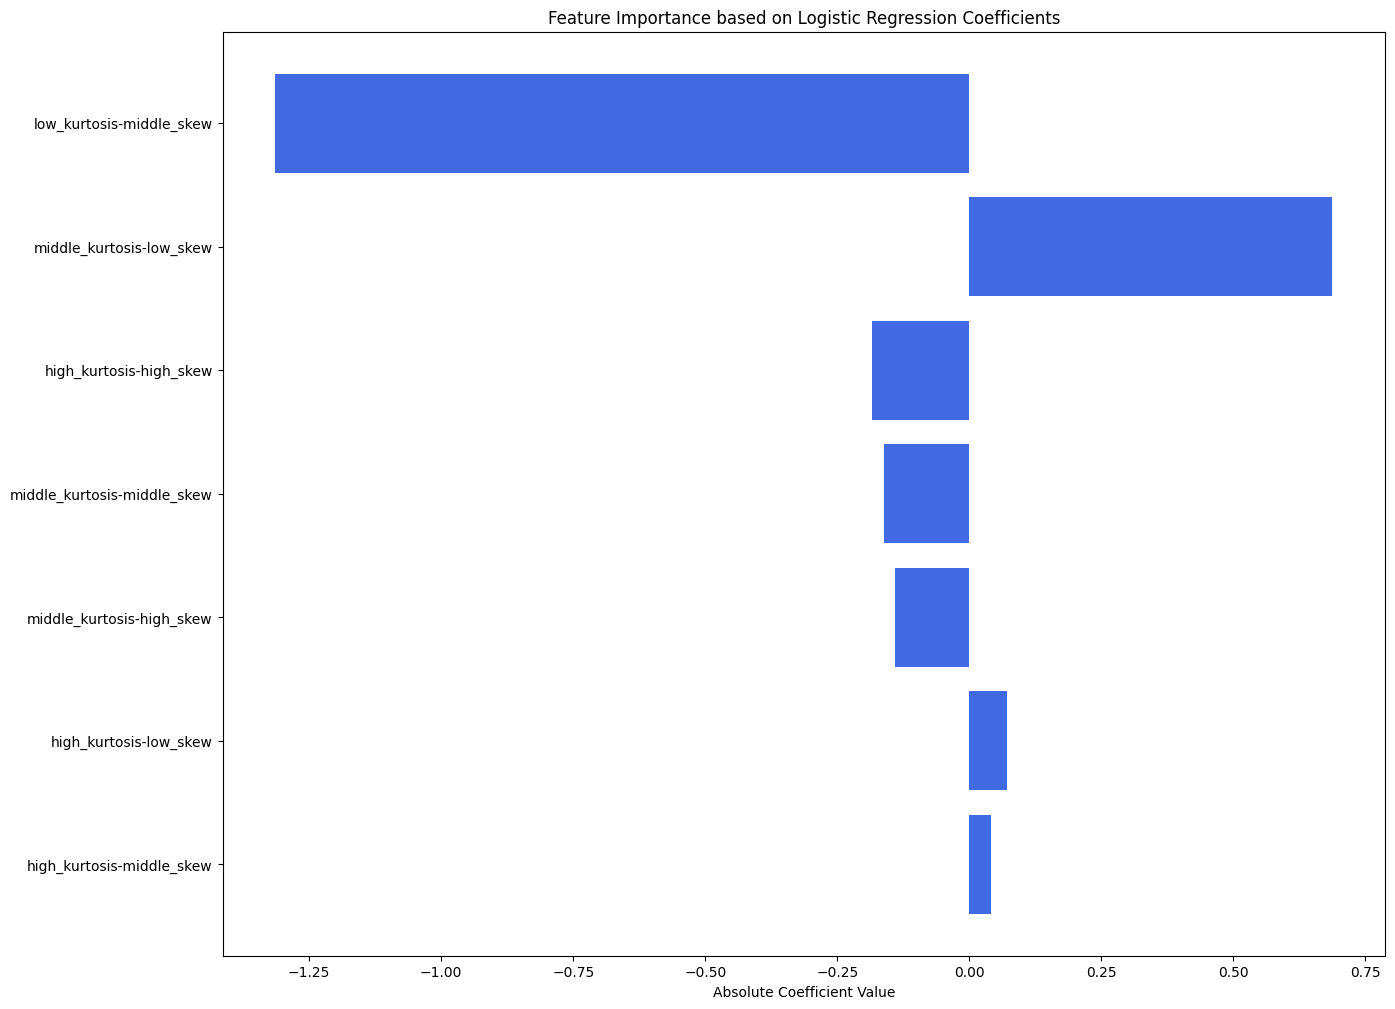

In [158]:
plt.figure(figsize=(15, 12))
plt.barh(g_features_df['Features'], g_features_df['Coefficients'], color='royalblue')
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance based on Logistic Regression Coefficients')
plt.gca().invert_yaxis()
plt.show()

### Optional: Kde Plot

array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'

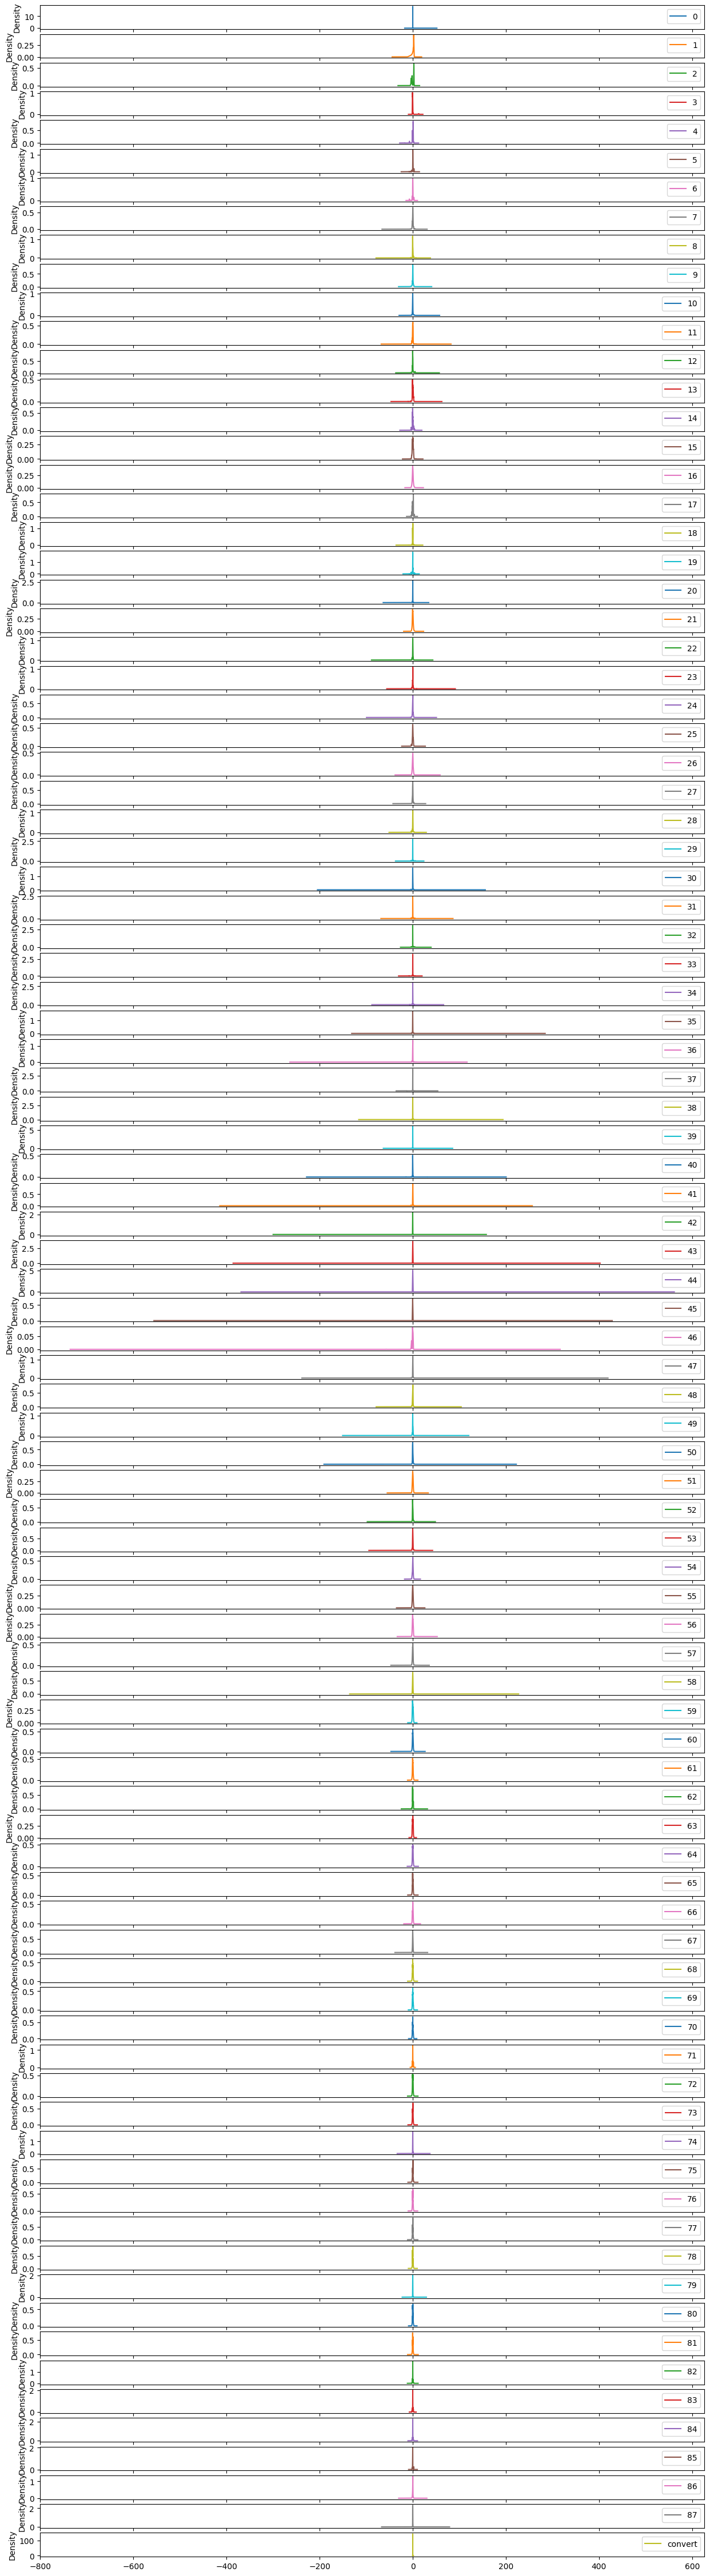

In [102]:
data_df.plot(kind='kde', subplots=True, figsize=(15, 58))